# Markov Chains
By Paxton Schweigert

# What is a Markov Chain?

A Markov chain "is a stochastic model describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event."

#### What does that actually mean?
* Stochastic means "randomly determined; having a random probability distribution or pattern that may be analyzed statistically but may not be predicted precisely."
* The last part of the definition of a Markov chain is very important. In fact, the concept of that each event depends only on the state directly before it is called the Markov property. This property makes our model "memoryless" as the events before the current state have no affect on the next state.

#### What does a Markov chain look like?

# What Do We Need to Represent a Markov Chain?
It's actually very simple!
All we require is two things: A transition matrix and an initial state vector.
#### Transition Matrix:
For a Markov chain consitsting of $n$ states, we may write the transition matrix as 
$A = (a_{ij}) \in \mathbb{R}^{nxn}$ where $a_{ij}$ is the probability of the system being in state $i$ after being in state $j$

For example, let's consider a system with 2 states, cold and hot. Let's say there is a 70% chance of it being cold after it being hot, there's a 40% chance of it being hot after it's cold and there's a 60% chance for it stay cold and a 30% chance for it to stay hot.
Our transition matrix would therefore be 
$$
A =
\begin{pmatrix}
0.6& 0.7\\\
0.4& 0.3
\end{pmatrix}
$$
Notice that the columns add to 1.0


$\newcommand\mycolv[1]{\begin{bmatrix}#1\end{bmatrix}}$
#### State Vector:
For a state vector, we would write for a markov chain with $n$ states in the $k$th iteration: $x^{(k)}=\mycolv{x_1\\x_2\\\vdots\\x_n}$ where $x_i = $ the probability our system is in state $i$
Just like our columns in the transition matrix, our vector's probabilities $x_1+x_2+\ldots+x_i=1$
#### Putting it together:
We can find the next state vector by multiplying the state vector with the transition matrix: $x^{(k+1)}=Ax^{(k)}$
For our previous example with the transition matrix, let's say that it is in state cold initally: $$x^{(0)}= \mycolv{1.0\\0}$$
$$\therefore x^{(1)}=\begin{pmatrix}
0.6& 0.7\\\
0.4& 0.3
\end{pmatrix} \mycolv{1.0\\0}=\mycolv{0.6\\0.4}$$

# An Application of Markov Chains
### A scenario from our book:
> Here is a simple game. a player bets on coin tosses, a dollar each time, and the
game ends either when the player has no money or is up to five dollars. If the
player starts with three dollars, what is the chance that the game takes at least
five flips? Twenty-five flips?
At any point, this player has either \\$0, or \\$1, . . . , or \\$5. We say that the
player is in the state $s_0 $, $s_1$ , . . . , or $s_5$. In the game the player moves from state
to state. For instance, a player now in state $s_3$ has on the next flip a 0.5 chance
of moving to state $s_2$ and a 0.5 chance of moving to $s_4$. The boundary states
are different; a player never leaves state $s_0$ or state $s_5$.
Let $p_i(n)$ be the probability that the player is in state $s_i$ after n flips. Then
for instance the probability of being in state $s_0$ after flip $n + 1$ is $p_0(n + 1) =
p_0(n) + 0.5*p_1(n). $ This equation summarizes.

$$
\begin{pmatrix}
1.0& 0.5& 0.0& 0.0& 0.0& 0.0\\\
0.0& 0.0& 0.5& 0.0& 0.0& 0.0\\\
0.0& 0.5& 0.0& 0.5& 0.0& 0.0\\\
0.0& 0.0& 0.5& 0.0& 0.5& 0.0\\\
0.0& 0.0& 0.0& 0.5& 0.0& 0.0\\\
0.0& 0.0& 0.0& 0.0& 0.5& 1.0
\end{pmatrix}
\begin{pmatrix}
p_0(n)\\\
p_1(n)\\\
p_2(n)\\\
p_3(n)\\\
p_4(n)\\\
p_5(n)
\end{pmatrix}
=
\begin{pmatrix}
p_0(n+1)\\\
p_1(n+1)\\\
p_2(n+1)\\\
p_3(n+1)\\\
p_4(n+1)\\\
p_5(n+1)
\end{pmatrix}
$$

In [9]:
# imports
from music21 import corpus
from music21.chord import Chord
from music21.stream import Stream
import numpy as np
import os
import pickle
import re 
import matplotlib.pyplot as plt
import random
import pandas as pd
from copy import deepcopy

In [76]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [77]:
M = np.array([[1.0, 0.5, 0.0, 0.0, 0.0, 0.0],       # Transition matrix, or leftmost matrix in previous illustration
              [0.0, 0.0, 0.5, 0.0, 0.0, 0.0],
              [0.0, 0.5, 0.0, 0.5, 0.0, 0.0],
              [0.0, 0.0, 0.5, 0.0, 0.5, 0.0],
              [0.0, 0.0, 0.0, 0.5, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.5, 1.0]])

v0 = np.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0])       # Vector containing the initial state ($3)

# Multiplying the two matrices together gives us the vector of probabilities for each state in the next iteration
v1 = np.matmul(M,v0)
print("v1 = ", v1)

v2 = np.matmul(M,v1)
print("v2 = ", v2)

v3 = np.matmul(M,v2)
print("v3 = ", v3)

v4 = np.matmul(M,v3)
print("v4 = ", v4)

v1 =  [ 0.000  0.000  0.500  0.000  0.500  0.000]
v2 =  [ 0.000  0.250  0.000  0.500  0.000  0.250]
v3 =  [ 0.125  0.000  0.375  0.000  0.250  0.250]
v4 =  [ 0.125  0.188  0.000  0.312  0.000  0.375]


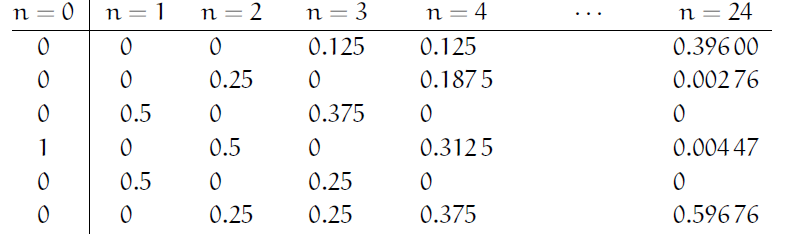 <p style="text-align: center;">Each row represents a specific state. We have 6 possible states: \\$0-\\$5. </p>

# A More Interesting Application
I got the idea to apply Markov chains to music after I saw the section in the Wikipedia page suggesting that you could do as much. Here is my process for doing so:
#### Step 1: Get data
This ended up being a collection of Bach scores. 

#### Step 2: Process data
This step ended up being the most time consuming process of them all. My idea initially was to consider note transitions as my states. However, the majority of compositions have multiple notes playing at the same time which transition to a different number of notes which would make analysis very hard. Instead, I used a library to "chordify" the Bach compositions which basically just approximated all the intricate melody and harmony with chords. After that, I was able to look at the chords and build a transition matrix with the chord changes right? Wrong. This chordify process left some really complicated chords. Therefore, I approximated all these complicated chords into just four chord types for every root note: major, minor, diminished, and augmented.

In [78]:

full_paths = corpus.getComposer('bach', 'mxl')
paths = []

for path in full_paths:
    paths.append(path)
    
majors = dict([("A-", 4),("G#", 4),("A", 3),("A#", 2),("B-", 2),("B", 1),("C", 0),("C#", -1),("D-", -1),("D", -2),("D#", -3),("E-", -3),("E", -4),("F", -5),("F#", 6),("G-", 6),("G", 5)])
minors = dict([("G#", 1), ("A-", 1),("A", 0),("A#", -1),("B-", -1),("B", -2),("C", -3),("C#", -4),("D-", -4),("D", -5),("D#", 6),("E-", 6),("E", 5),("F", 4),("F#", 3),("G-", 3),("G", 2)])

chorded_list = []    
for song in paths:
    score = corpus.parse(song)
    
    key = score.analyze('key')
#    print key.tonic.name, key.mode
    if key.mode == "major":
        halfSteps = majors[key.tonic.name]
        
    elif key.mode == "minor":
        halfSteps = minors[key.tonic.name]
    
    b = score.transpose(halfSteps)
    key = b.analyze('key')
    print(key)
    
    bChords = b.chordify()
    chorded_list.append(bChords)

# Dump to file
dbfile = open("chorded_list.p", "wb")
pickle.dump( chorded_list, dbfile )
dbfile.close()



C major
a minor
a minor
a minor
a minor
C major
a minor
C major
a minor
a minor
C major
C major
a minor
a minor
C major
C major
C major
C major
C major
C major
C major
a minor
a minor
a minor
C major
a minor
a minor
C major
C major
C major
C major
C major
a minor
a minor
C major
C major
a minor
C major
C major
a minor
C major
a minor
C major
a minor
C major
C major
a minor
a minor
C major
C major
C major
C major
C major
C major
a minor
C major
a minor
a minor
a minor
C major
C major
a minor
a minor
C major
C major
C major
C major
a minor
C major
a minor
C major
a minor
a minor
a minor
a minor
a minor
C major
a minor
C major
a minor
a minor
a minor
C major
C major
C major
C major
C major
C major
a minor
C major
C major
a minor
C major
C major
C major
a minor
a minor
a minor
a minor
a minor
C major
C major
a minor
a minor
a minor
C major
a minor
C major
C major
C major
C major
a minor
a minor
a minor
C major
C major
a minor
a minor
C major
C major
C major
a minor
a minor
C major
a minor


In [4]:
import pickle
# load from file
dbfile = open("chorded_list.p", "rb")
chorded_list = pickle.load(dbfile)
dbfile.close()

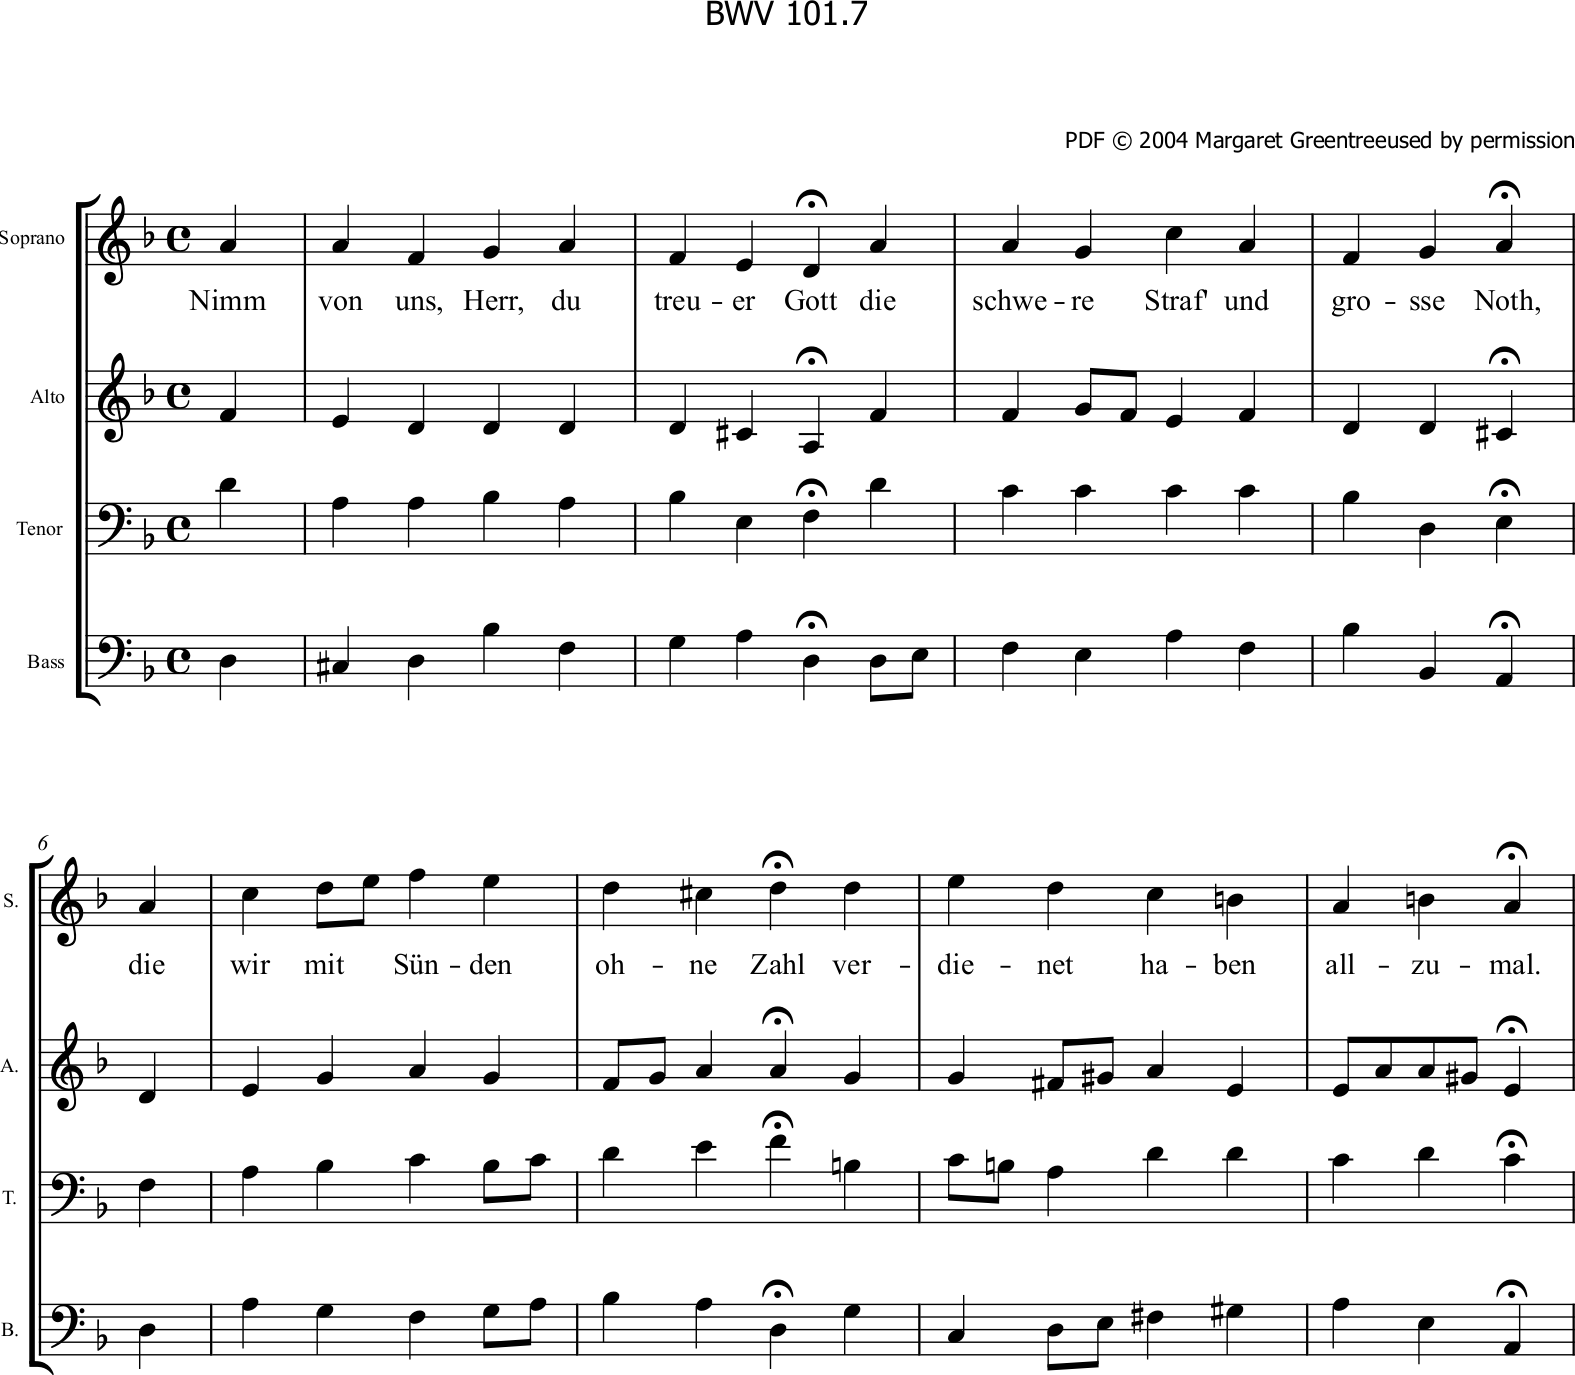

In [15]:
full_paths = corpus.getComposer('bach', 'mxl')
paths = []

for path in full_paths:
    paths.append(path)
pre_chordify = corpus.parse(full_paths[2])
pre_chordify.show()


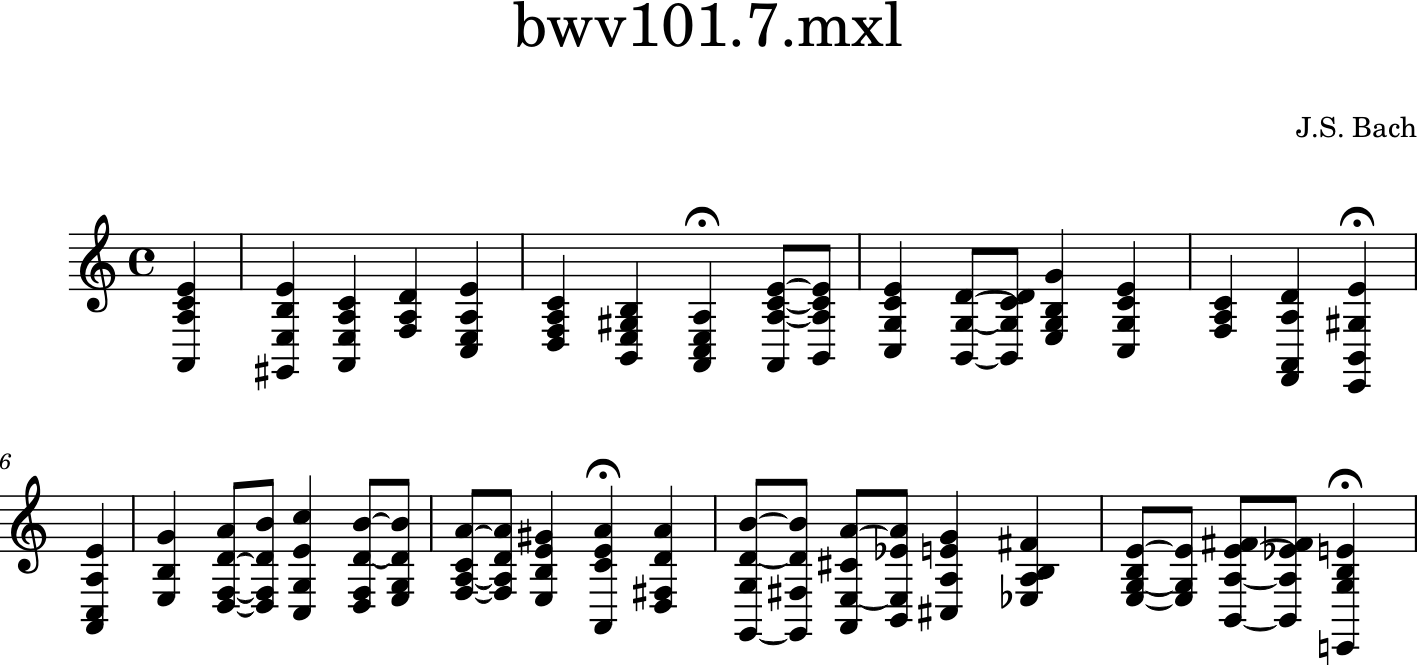

In [14]:
chorded_list[2].show()

In [6]:
total_chord_list = []
for bChord in chorded_list:
    chord_list = []
    for thisChord in bChord.recurse().getElementsByClass('Chord'):
        chord_list.append(thisChord.pitchedCommonName)
    total_chord_list.append(chord_list)
        
print(total_chord_list)

[['C-major triad', 'G-major triad', 'G-major triad', 'C-major triad', 'C-major triad', 'A-minor triad', 'A-minor triad', 'C-major triad', 'C-major triad', 'F-major triad', 'F-major triad', 'F-major-ninth chord', 'D-major pentatonic', 'F-major triad', 'B-diminished-major ninth chord', 'C-major triad', 'C-major triad', 'F-major triad', 'D-minor seventh chord', 'F-major seventh chord', 'B-perfect-fourth diminished tetrachord', 'G-dominant seventh chord', 'B-diminished triad', 'C-major triad', 'D-dominant seventh chord', 'G-major triad', 'G-major triad', 'A-minor seventh chord', 'F#-Kumoi pentachord', 'A-major-second minor tetrachord', 'D-major triad', 'G-major triad', 'C-major triad', 'Major Third with octave doublings above C', 'F-major triad', 'D-minor seventh chord', 'E-minor triad', 'E-minor seventh chord', 'F-major seventh chord', 'G-dominant seventh chord', 'C-major triad', 'C-major triad', 'C-quartal trichord', 'C-major-second major tetrachord', 'C-major-second major tetrachord', '

476

In [16]:
freq = {}

for chord in [item for sublist in total_chord_list for item in sublist]:
    if chord in freq:
        freq[chord] += 1
    else:
        freq[chord] = 1
        
print(freq)
print(len(freq))


{'C-major triad': 5063, 'G-major triad': 3307, 'A-minor triad': 3337, 'F-major triad': 1725, 'F-major-ninth chord': 60, 'D-major pentatonic': 16, 'B-diminished-major ninth chord': 23, 'D-minor seventh chord': 701, 'F-major seventh chord': 447, 'B-perfect-fourth diminished tetrachord': 60, 'G-dominant seventh chord': 1332, 'B-diminished triad': 638, 'D-dominant seventh chord': 599, 'A-minor seventh chord': 730, 'F#-Kumoi pentachord': 2, 'A-major-second minor tetrachord': 301, 'D-major triad': 660, 'Major Third with octave doublings above C': 208, 'E-minor triad': 894, 'E-minor seventh chord': 386, 'C-quartal trichord': 482, 'C-major-second major tetrachord': 454, 'Perfect Fourth with octave doublings above G': 28, 'A-incomplete dominant-seventh chord': 101, 'G-dominant-ninth': 24, 'E-major pentatonic': 6, 'C-perfect-fourth major tetrachord': 265, 'D-minor triad': 1522, 'B-half-diminished seventh chord': 558, 'A-minor-ninth chord': 19, 'A-perfect-fourth minor tetrachord': 201, 'F-major-s

In [17]:
nice_chord_list = total_chord_list

chord_simps = []
chord_roots = ["A", "B", "C", "D", "E", "F", "G"]
chord_types = ["major", "minor"]
real_chord_roots = []

for root in chord_roots:
    real_chord_roots.append(root)
    real_chord_roots.append(root + "b")
    real_chord_roots.append(root + "#")

chord_roots = real_chord_roots

for root in chord_roots:
    for chord_type in chord_types:
        chord_simps.append(root + "-" + chord_type)

print(chord_simps)

for i in range(len(nice_chord_list)):
    current_list = nice_chord_list[i]
    for j in range(len(current_list)):
        current = current_list[j]
        
        match = re.search(r"[A-G][b#]*", current)
        match2 = re.search(r"(diminished|augmented)",current)

        found = False

        for chord_simp in chord_simps:
            if chord_simp in current:
                current_list[j] = chord_simp
                found = True
        if match and not found and not match2:
            if j != 0:
                if "major" in current_list[j-1]:
                    current_list[j] = match.group(0) + "-major"
                else:
                    current_list[j] = match.group(0) + "-minor"
            else:
                current_list[j] = match.group(0) + "-minor"
        elif not found:
            current_list[j] = match.group(0) + "-" + match2.group(0)
                
    nice_chord_list.append(current_list)
        

print(nice_chord_list)
        

['A-major', 'A-minor', 'Ab-major', 'Ab-minor', 'A#-major', 'A#-minor', 'B-major', 'B-minor', 'Bb-major', 'Bb-minor', 'B#-major', 'B#-minor', 'C-major', 'C-minor', 'Cb-major', 'Cb-minor', 'C#-major', 'C#-minor', 'D-major', 'D-minor', 'Db-major', 'Db-minor', 'D#-major', 'D#-minor', 'E-major', 'E-minor', 'Eb-major', 'Eb-minor', 'E#-major', 'E#-minor', 'F-major', 'F-minor', 'Fb-major', 'Fb-minor', 'F#-major', 'F#-minor', 'G-major', 'G-minor', 'Gb-major', 'Gb-minor', 'G#-major', 'G#-minor']
[['C-major', 'G-major', 'G-major', 'C-major', 'C-major', 'A-minor', 'A-minor', 'C-major', 'C-major', 'F-major', 'F-major', 'F-major', 'D-major', 'F-major', 'B-diminished', 'C-major', 'C-major', 'F-major', 'D-minor', 'F-major', 'B-diminished', 'G-minor', 'B-diminished', 'C-major', 'D-major', 'G-major', 'G-major', 'A-minor', 'F#-minor', 'A-major', 'D-major', 'G-major', 'C-major', 'C-major', 'F-major', 'D-minor', 'E-minor', 'E-minor', 'F-major', 'G-major', 'C-major', 'C-major', 'C-major', 'C-major', 'C-majo

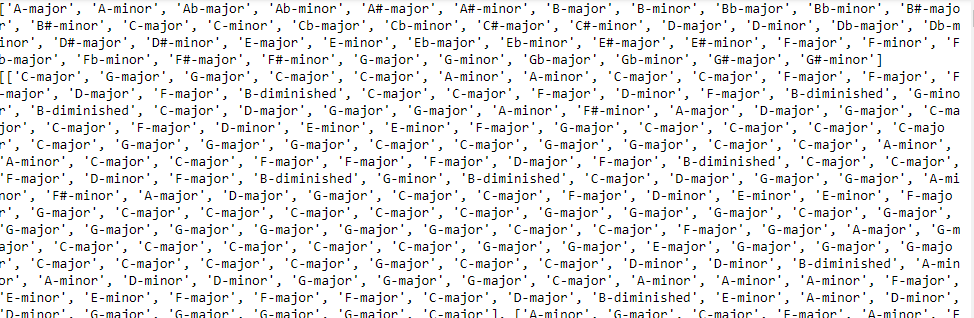

In [18]:
freq = {}
for chord in [item for sublist in nice_chord_list for item in sublist]:
    if chord in freq:
        freq[chord] += 1
    else:
        freq[chord] = 1
        
print(freq)

len(freq)


{'C-major': 14618, 'G-major': 10510, 'A-minor': 10012, 'F-major': 6188, 'D-major': 3968, 'B-diminished': 2660, 'D-minor': 5948, 'G-minor': 1422, 'F#-minor': 186, 'A-major': 2682, 'E-minor': 3922, 'E-major': 4502, 'C-minor': 730, 'B-major': 230, 'G#-diminished': 884, 'Eb-major': 106, 'B-minor': 1454, 'F#-diminished': 1274, 'Eb-minor': 174, 'C-augmented': 268, 'C#-major': 34, 'C#-diminished': 382, 'Bb-major': 346, 'F-augmented': 112, 'F-minor': 594, 'E-diminished': 362, 'G#-minor': 54, 'Eb-diminished': 20, 'G#-major': 54, 'D-diminished': 54, 'G-diminished': 18, 'Bb-minor': 32, 'F#-major': 98, 'A-diminished': 80, 'C#-minor': 20, 'F-diminished': 28, 'Eb-augmented': 40, 'Bb-diminished': 6, 'Bb-augmented': 18, 'C-diminished': 2, 'C#-augmented': 2}


41

#### Step 3: Analyze data
After all of that, we finally get to form a transition matrix out of the relative chord transition frequencies.

In [20]:
collapsed_chords = [item for sublist in total_chord_list for item in sublist]

average_chord_freq = pd.crosstab(pd.Series(collapsed_chords[1:],name='Next Chord'),
            pd.Series(collapsed_chords[:-1],name='Current Chord'),normalize=1)

print(average_chord_freq)

Current Chord  A-diminished   A-major   A-minor  B-diminished   B-major  \
Next Chord                                                                
A-diminished          0.050  0.002983  0.001398      0.000000  0.000000   
A-major               0.025  0.121551  0.033759      0.006015  0.147826   
A-minor               0.050  0.225205  0.263484      0.084211  0.121739   
B-diminished          0.025  0.007457  0.070915      0.069925  0.034783   
B-major               0.000  0.017151  0.000000      0.000000  0.095652   
B-minor               0.000  0.008949  0.056732      0.033083  0.034783   
Bb-augmented          0.000  0.000000  0.000200      0.000000  0.000000   
Bb-diminished         0.000  0.000000  0.000000      0.000000  0.000000   
Bb-major              0.075  0.008203  0.003196      0.000000  0.000000   
Bb-minor              0.000  0.000000  0.000400      0.000000  0.000000   
C#-augmented          0.000  0.000000  0.000000      0.000000  0.000000   
C#-diminished         0.0

#### Step 4: Use our model
Now that we have a transition matrix, we may simulate chord transitions with our model and then put them all together. Then we have music?!?!?! (not really)

In [22]:
def get_next_term(t_s):
    return random.choices(t_s.index, t_s)[0]

def make_chain(t_m, start_term, n):
    chain = [start_term]
    for i in range(n-1):
        chain.append(get_next_term(t_m[chain[-1]]))
    return chain

chain = make_chain(average_chord_freq, 'C-major', 50)

print(chain)

['C-major', 'C-major', 'G-major', 'G-major', 'B-diminished', 'G#-diminished', 'D-diminished', 'C-minor', 'F-major', 'F-major', 'F-major', 'G-major', 'C-major', 'G-major', 'E-minor', 'D-minor', 'E-minor', 'F-major', 'F-major', 'C#-diminished', 'G-minor', 'G-minor', 'D-minor', 'G-major', 'B-diminished', 'D-minor', 'G-major', 'C-major', 'C-major', 'G-major', 'C-major', 'D-major', 'F#-diminished', 'G-minor', 'G-minor', 'G-minor', 'A-major', 'D-minor', 'G-major', 'G-major', 'A-major', 'A-minor', 'D-minor', 'D-minor', 'G-major', 'C-major', 'G-minor', 'G-minor', 'D-minor', 'D-minor']


In [23]:
chord_conv = {}

for i in range(12):
    major = Chord([i, (4+i)%12, (7+i)%12])
    chord_conv[major.pitchedCommonName[:8].strip()] = major
    minor = Chord([i,(3+i)%12, (7+i)%12])
    chord_conv[minor.pitchedCommonName[:8].strip()] = minor
    diminished = Chord([i,(3+i)%12, (6+i)%12])
    chord_conv[diminished.pitchedCommonName[:13].strip()] = diminished
    augmented = Chord([i, (4+i)%12, (8+i)%12])
    chord_conv[augmented.pitchedCommonName[:12].strip()] = augmented

chain_chords = []

print(chord_conv)
    
for chord in chain:
    chain_chords.append(deepcopy(chord_conv[chord]))
    
print(chain_chords)


{'C-major': <music21.chord.Chord C E G>, 'C-minor': <music21.chord.Chord C E- G>, 'C-diminished': <music21.chord.Chord C E- G->, 'C-augmented': <music21.chord.Chord G# C E>, 'C#-major': <music21.chord.Chord C# E# G#>, 'C#-minor': <music21.chord.Chord C# E G#>, 'C#-diminished': <music21.chord.Chord C# E G>, 'F-augmented': <music21.chord.Chord C# F A>, 'D-major': <music21.chord.Chord D F# A>, 'D-minor': <music21.chord.Chord D F A>, 'D-diminished': <music21.chord.Chord D F A->, 'D-augmented': <music21.chord.Chord F# A# D>, 'Eb-major': <music21.chord.Chord E- G B->, 'Eb-minor': <music21.chord.Chord E- G- B->, 'enharmonic eq': <music21.chord.Chord E- F# A>, 'Eb-augmented': <music21.chord.Chord B E- G>, 'E-major': <music21.chord.Chord E G# B>, 'E-minor': <music21.chord.Chord E G B>, 'E-diminished': <music21.chord.Chord E G B->, 'E-augmented': <music21.chord.Chord E G# B#>, 'F-major': <music21.chord.Chord F A C>, 'F-minor': <music21.chord.Chord F A- C>, 'F-diminished': <music21.chord.Chord F 

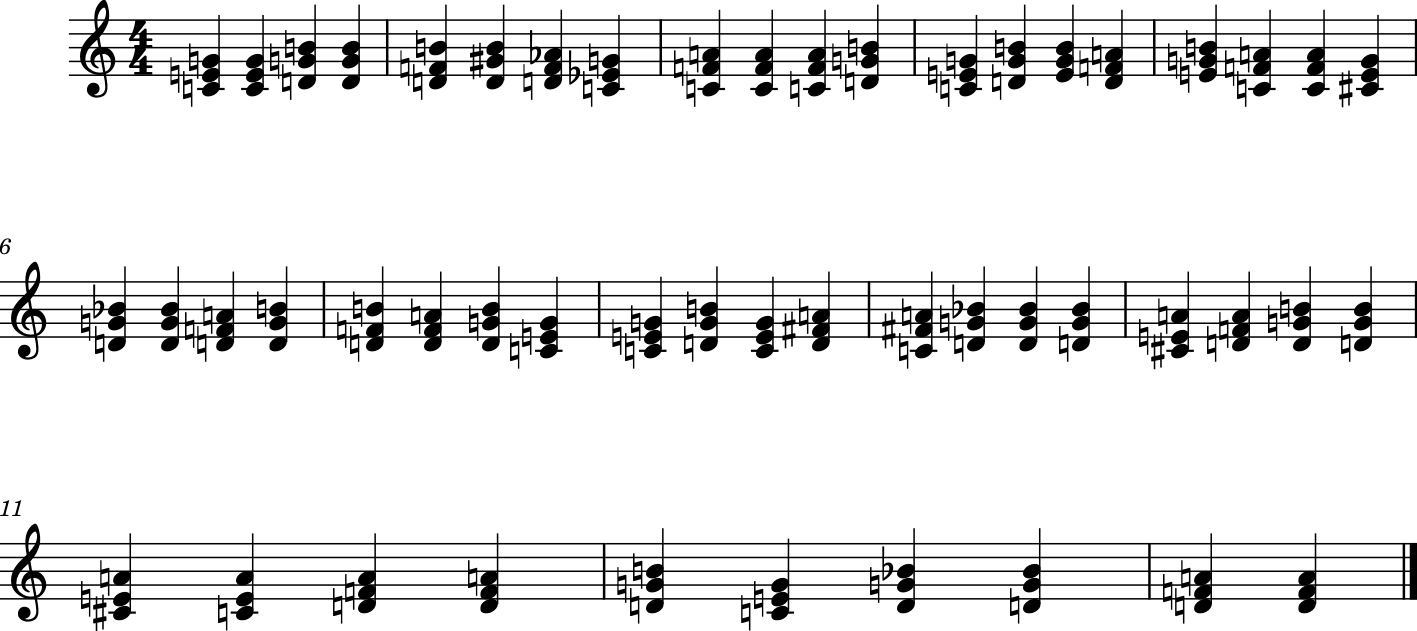

In [25]:
stream = Stream()

for chord in chain_chords:
    stream.append(chord)

stream.show()
stream.show('midi')